# Import required libraries

In [1]:
import os
# libraries for data reading and modification
import numpy as np
import pandas as pd
# libraries to visualize data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
import random
import warnings
warnings.filterwarnings("ignore")

# libraries required to build ML and DNN models
from sklearn.preprocessing import PolynomialFeatures, normalize, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.metrics import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
%matplotlib inline

# Preprocessing Dataset

In [3]:
# Read the dataset from user input
spotify = pd.read_csv(input("Enter Dataset path: "), delimiter=';')
spotify.head()

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 1,Eslabon Armado,Nationality 1,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
1,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
2,2,WHERE SHE GOES,Bad Bunny,29/05/2023,0.652,0.800,-4019.0,0.061,0.143,0.629,0.234,Artist 1,Bad Bunny,Nationality 1,Puerto Rico,Latin-America,199,199.0,7ro0hRteUMfnOioTFI5TG1,https://open.spotify.com/track/7ro0hRteUMfnOio...
3,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 1,Yng Lvcas,Nationality 1,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...
4,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...


In [4]:
# Display basic information about the dataset
spotify.shape

(651936, 20)

In [5]:
# Display descriptive statistics of the dataset
spotify.describe()

,Rank,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Points (Total),Points (Ind for each Artist/Nat)
count,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000
mean,100.407782,0.697730,0.652049,-5295.645217,0.109946,0.230694,0.007647,0.523134,100.592218,72.391141
std,57.406664,0.133186,0.155684,2785.261321,0.096841,0.230710,0.054724,0.223926,57.406664,54.227892
min,1.000000,0.073000,0.005000,-34475.000000,0.022000,0.000000,0.000000,0.026000,1.000000,0.200000
25%,51.000000,0.617000,0.549000,-6825.000000,0.045000,0.048000,0.000000,0.356000,51.000000,28.000000
50%,100.000000,0.719000,0.671000,-5206.000000,0.068000,0.152000,0.000000,0.521000,101.000000,60.000000
75%,150.000000,0.793000,0.771000,-3885.000000,0.136000,0.349000,0.000000,0.696000,150.000000,104.000000
max,200.000000,0.985000,0.996000,1509.000000,0.966000,0.994000,0.956000,0.982000,200.000000,200.000000


In [6]:
spotify.nunique() #2208 unique artists from 74 unique nationalities. One song at max played by 9 artists, 9161 unique songs

Rank                                 200
Title                               7457
Artists                             2928
Date                                2336
Danceability                         739
Energy                               860
Loudness                            5331
Speechiness                          532
Acousticness                         952
Instrumentalness                     305
Valence                              937
# of Artist                            9
Artist (Ind.)                       2208
# of Nationality                       9
Nationality                           74
Continent                              7
Points (Total)                       200
Points (Ind for each Artist/Nat)     477
id                                  9161
Song URL                            9161
dtype: int64

## PCA

<Axes: >

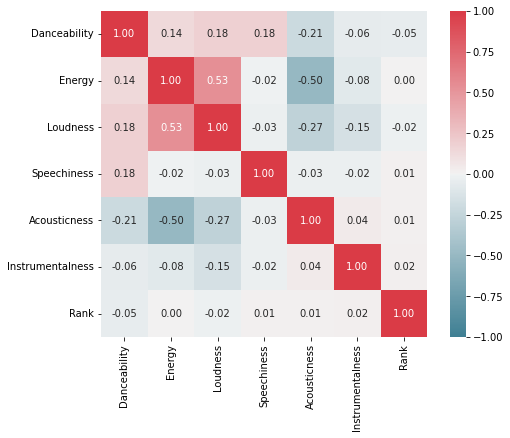

In [7]:
#Removing the unwanted rows and columns
spotify.drop("id" ,axis =1 ,inplace= True)
spotify.drop("Song URL" ,axis =1 ,inplace= True)
#Creating dataset of song attributes only
spotify_songatts = spotify.iloc[:,4:10]
spotify_songatts["Rank"] = spotify.iloc[:,0]
# spotify_songatts.corr()
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(spotify_songatts.corr(),
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    annot=True,
    fmt=".2f",
    square=True, ax=ax)

In [8]:
#Normalizing the values in dataset to between 0 and 1
spotify_songatts1 = StandardScaler().fit_transform(spotify_songatts)
#Finding the covariance of new dataset. spotify_songatts.corr() can also be used
cov = (spotify_songatts1.T @ spotify_songatts1) / (spotify_songatts1.shape[0] - 1)

([<matplotlib.axis.XTick at 0x1a05044fe80>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7')])

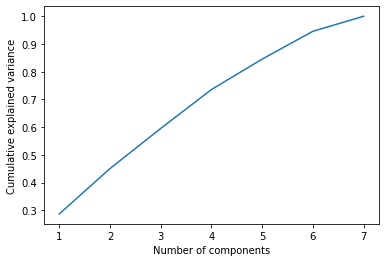

In [9]:
#Finding the eigen values from covariance matrix. Performing eigen decomposition. Refer: https://towardsdatascience.com/a-step-by-step-introduction-to-pca-c0d78e26a0dd
eig_values, eig_vectors = np.linalg.eig(cov)
#Determining which princial components to select
idx = np.argsort(eig_values, axis=0)[::-1]
sorted_eig_vectors = eig_vectors[:, idx]
cumsum = np.cumsum(eig_values[idx]) / np.sum(eig_values[idx])
xint = range(1, len(cumsum) + 1)
plt.plot(xint, cumsum)

plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.xticks(xint)
#PCA not possible with song attributes. Maximum we can do is 6 to 5. Since each attribute adding something to the fuct

## **Outlier Analysis**

Rank                                   Axes(0.125,0.848277;0.032563x0.0317227)
Danceability                        Axes(0.164076,0.848277;0.032563x0.0317227)
Energy                              Axes(0.203151,0.848277;0.032563x0.0317227)
Loudness                            Axes(0.242227,0.848277;0.032563x0.0317227)
Speechiness                         Axes(0.281303,0.848277;0.032563x0.0317227)
Acousticness                        Axes(0.320378,0.848277;0.032563x0.0317227)
Instrumentalness                    Axes(0.359454,0.848277;0.032563x0.0317227)
Valence                             Axes(0.398529,0.848277;0.032563x0.0317227)
Points (Total)                      Axes(0.437605,0.848277;0.032563x0.0317227)
Points (Ind for each Artist/Nat)    Axes(0.476681,0.848277;0.032563x0.0317227)
dtype: object

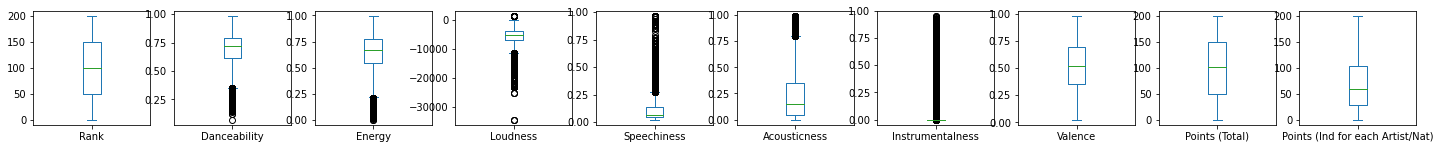

In [10]:
# Identify outliers in the dataset
outlier= list(spotify.select_dtypes('float64').columns)
fig = px.box(spotify, y=outlier)
spotify.plot(kind = "box" , subplots = True , figsize = (50,50) , layout = (20,20))

## **Other Analysis of data**

**Which nations produce most songs ?**

In [11]:
# Analyze distribution of nationalities and continents
nationality_counts = spotify['Nationality'].value_counts()
continent_order = spotify['Continent'].unique()
# nationality_counts

In [12]:
nationality_df = pd.DataFrame({'Nationality': nationality_counts.index, 'Count': nationality_counts.values})
fig_nationality = px.bar(nationality_df, x='Nationality', y='Count', color='Nationality',
                         title='Distribution of Nationalities and Continents')
fig_nationality.update_layout(xaxis_title='Nationality', yaxis_title='Count', xaxis_tickangle=-45)
fig_nationality.show()

**Which artist produces most songs ?**

In [13]:
spotify_artist = spotify.iloc[:,12:15]
spotify_artist = spotify_artist.drop(['# of Nationality'], axis=1)
spotify_artist["title"] = spotify.iloc[:,1]
spotify_artistv1 = spotify_artist.drop_duplicates(subset=None, keep="first", inplace=False)
# spotify_artistv1

In [14]:
artist_song_counts = spotify_artistv1.groupby('Artist (Ind.)')['title'].count().reset_index()
top_10 = artist_song_counts.sort_values(by=['title'], ascending=False).iloc[0:10,:]

In [15]:
fig = px.bar(top_10, x='Artist (Ind.)', y='title')
fig.update_xaxes(title_text='Artist Name')
fig.update_yaxes(title_text='Number of Songs')
fig.update_layout(title='Number of unique Songs per Artist')
fig.update_layout(xaxis_tickangle=-45)

fig.show()

**How song attributes change of the years ?**

In [35]:
spotify['Date'] = pd.to_datetime(spotify['Date'],errors='ignore')
spotify['Year'] = spotify['Date'].dt.year
grouped_data = spotify.groupby('Year').agg({'Danceability': 'mean', 'Energy': 'mean','Loudness': 'mean','Speechiness': 'mean','Acousticness': 'mean','Instrumentalness': 'mean'}).reset_index()
fig = px.scatter(grouped_data, x='Year', y=['Danceability', 'Energy','Speechiness','Acousticness','Instrumentalness'],
                 labels={'Danceability': 'Danceability', 'Energy': 'Energy','Speechiness': 'Speechiness','Acousticness': 'Acousticness','Instrumentalness': 'Instrumentalness' ,'Year': 'Year'},
                 title='Song Attributes Over the Years')

fig.update_traces(marker=dict(size=8))

fig.show()

In [17]:
new_df = pd.DataFrame([],columns=spotify.columns)

# Hit song detection

In [18]:
best_songs={}
if 'req_met_songs.txt' in os.listdir():
    c=True
    with open('req_met_songs.txt','r') as f:
        str_song = f.read()
        str_song = str_song.split(',')
        for i in str_song:
            if '{' in i:
                i=i.replace('{','')
            if  "}" in i:
                i=i.replace('}','')
            if c:
                best_songs[i.split(':')[0][1:-1]]=int(i.split(':')[1])
                c=False
            else:
                best_songs[i.split(':')[0][2:-1]]=int(i.split(':')[1])
else:
    for i in spotify['id'].unique():
        fdf = spotify[spotify['id']==i]
        fdf['Rank Diff'] = fdf['Rank'].diff()
        if fdf['Rank'].mean()<70 and fdf['Rank'].corr(fdf['Rank Diff'])<0.1:
            best_songs[i]=1
        else:
            best_songs[i]=0
    with open('req_met_songs.txt','w') as f:
        f.write(str(best_songs))
        


In [20]:
# Create a column 'results' in the dataset based on hit song detection
result_best_song = []
result_best_song=[]
spotify = pd.read_csv(input("Enter Dataset path: "), delimiter = ';')
for i in spotify['id']:
    result_best_song.append([best_songs[i]]) 
spotify['results'] = pd.DataFrame(result_best_song)

new_df = spotify.drop_duplicates(subset='id', keep='first')


# Resampling dataset

In [6]:
# Resample the dataset to balance classes
process_df = spotify.drop(['Rank','Title','Date','Artists','# of Artist','Artist (Ind.)','# of Nationality','Nationality','Continent','Points (Total)','Points (Ind for each Artist/Nat)','id','Song URL'],axis=1)
true_data = process_df[process_df['results']==1]
false_data = process_df[process_df['results']==0]
true_data_upsampled = resample(true_data, replace=True, n_samples=len(false_data), random_state=42)
balanced_data = pd.concat([false_data, true_data_upsampled])
balanced_data = balanced_data.sample(frac=1, random_state=42)
balanced_data.head()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,results
147942,0.659,0.688,-4649.0,0.067,0.207,0.000,0.632,0
459853,0.854,0.569,-8151.0,0.106,0.061,0.082,0.294,0
241390,0.793,0.771,-3417.0,0.096,0.034,0.000,0.835,1
454024,0.760,0.479,-5574.0,0.047,0.556,0.000,0.913,0
435048,0.392,0.402,-9961.0,0.054,0.288,0.000,0.228,0


# Evaluation metrics

In [7]:
def eval_metric(Y_test,X_test,model):
    accuracy = model.score(X_test, Y_test)
    print("Accuracy:", accuracy)
    res = model.predict(X_test)
    sns.heatmap(confusion_matrix(Y_test,res),annot=True)
    print('F1-score is: ',f1_score(Y_test,res))
    print(classification_report(Y_test,res))
    fpr, tpr, thresholds = roc_curve(Y_test, res)
    print(f"FPR (False Positive Rate): {fpr}")
    print(f"TPR (True Positive Rate): {tpr}")
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

# Model initialization and execution

Logistic Regression 
Accuracy: 0.4990979042960424
F1-score is:  0.0
              precision    recall  f1-score   support

           0       0.50      1.00      0.67    115936
           1       0.00      0.00      0.00    116301

    accuracy                           0.50    232237
   macro avg       0.25      0.50      0.33    232237
weighted avg       0.25      0.50      0.33    232237

FPR (False Positive Rate): [0.0000000e+00 2.3288711e-04 1.0000000e+00]
TPR (True Positive Rate): [0. 0. 1.]


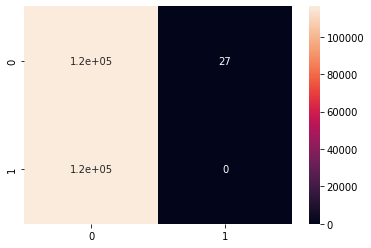

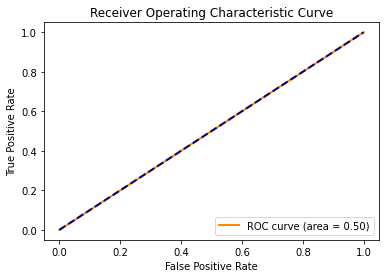

Random Forest
Accuracy: 0.7817445109952333
F1-score is:  0.8050432514971673
              precision    recall  f1-score   support

           0       0.87      0.66      0.75    115936
           1       0.73      0.90      0.81    116301

    accuracy                           0.78    232237
   macro avg       0.80      0.78      0.78    232237
weighted avg       0.80      0.78      0.78    232237

FPR (False Positive Rate): [0.         0.33672026 1.        ]
TPR (True Positive Rate): [0.         0.89983749 1.        ]


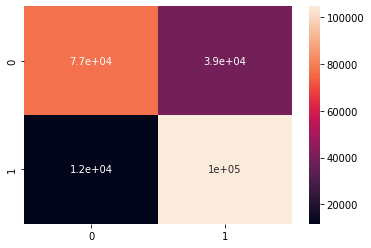

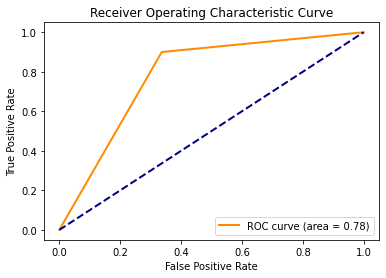

Naive Bayes
Accuracy: 0.5311944263833929
F1-score is:  0.6152019170277587
              precision    recall  f1-score   support

           0       0.55      0.31      0.40    115936
           1       0.52      0.75      0.62    116301

    accuracy                           0.53    232237
   macro avg       0.54      0.53      0.51    232237
weighted avg       0.54      0.53      0.51    232237

FPR (False Positive Rate): [0.         0.68662883 1.        ]
TPR (True Positive Rate): [0.         0.74833406 1.        ]


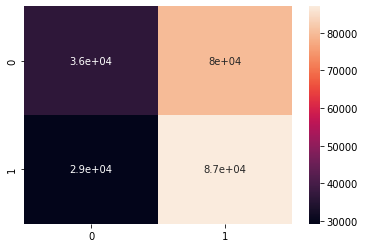

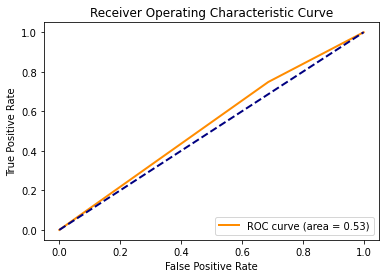

In [8]:
X = balanced_data.drop('results',axis=1)
y = balanced_data['results']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)


LR_model = LogisticRegression()
LR_model.fit(X_train, Y_train)
print("Logistic Regression ")
eval_metric(Y_test,X_test,LR_model)

RF_model = RandomForestClassifier(max_depth=5)
RF_model.fit(X_train, Y_train)
print('Random Forest')
eval_metric(Y_test,X_test,RF_model)

NB_model = GaussianNB()
NB_model.fit(X_train, Y_train)
print('Naive Bayes')
eval_metric(Y_test,X_test,NB_model)

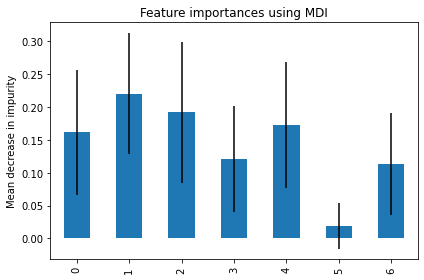

In [9]:
# Plots the feature importances for each feature. This is a bar plot and will be plotted on the subplots
importances = RF_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF_model.estimators_], axis=0)
forest_importances = pd.Series(importances)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [10]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
custom_optimizer = Adam(lr=0.001)
model = Sequential()
model.add(Dense(64, input_dim=7, activation='relu'))
model.add(Dense(32, activation='relu'))  
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
model.compile(loss='binary_crossentropy', optimizer=custom_optimizer, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 4)                 68        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 3,193
Trainable params: 3,193
Non-trainable params: 0
_________________________________________________________________


In [11]:

history = model.fit(
    x_train, Y_train, 
    epochs=50, 
    verbose=1,
    callbacks=[early_stopping, reduce_lr]
)
model.save('final_NNmodel.h5')

Epoch 1/50
29007/29030 [============================>.] - ETA: 0s - loss: 0.1908 - accuracy: 0.9261WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29030/29030 [==============================] - 43s 1ms/step - loss: 0.1907 - accuracy: 0.9262 - lr: 0.0010
Epoch 2/50
29018/29030 [============================>.] - ETA: 0s - loss: 0.0936 - accuracy: 0.9708WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29030/29030 [==============================] - 38s 1ms/step - loss: 0.0936 - accuracy: 0.9708 - lr: 0.0010
Epoch 3/50
29027/29030 [============================>.] - ETA: 0s - loss: 0.0770 - accuracy: 0.9762WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29030/29030 [==============================] - 57s 2ms/step - loss: 0.0770 - accuracy: 0.9762 - lr: 0.0010
Epoch 4/50
29005/29030 [============================>.] - ETA: 0s - loss: 0.0676 - accuracy: 0.9791WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29030/29030 [==============================] - 48s 2ms/step - loss: 0.0676 - accuracy: 0.9792 - lr: 0.0010
Epoch 5/50
29024/29030 [============================>.] - ETA: 0s - loss: 0.0601 - accuracy: 0.9818WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29030/29030 [==============================] - 51s 2ms/step - loss: 0.0601 - accuracy: 0.9819 - lr: 0.0010
Epoch 6/50
29009/29030 [============================>.] - ETA: 0s - loss: 0.0537 - accuracy: 0.9839WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29030/29030 [==============================] - 38s 1ms/step - loss: 0.0537 - accuracy: 0.9839 - lr: 0.0010
Epoch 7/50
29024/29030 [============================>.] - ETA: 0s - loss: 0.0503 - accuracy: 0.9852WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29030/29030 [==============================] - 43s 1ms/step - loss: 0.0503 - accuracy: 0.9852 - lr: 0.0010
Epoch 8/50
29026/29030 [============================>.] - ETA: 0s - loss: 0.0474 - accuracy: 0.9861WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29030/29030 [==============================] - 55s 2ms/step - loss: 0.0474 - accuracy: 0.9861 - lr: 0.0010
Epoch 9/50
29030/29030 [==============================] - ETA: 0s - loss: 0.0453 - accuracy: 0.9866WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29030/29030 [==============================] - 46s 2ms/step - loss: 0.0453 - accuracy: 0.9866 - lr: 0.0010
Epoch 10/50
29021/29030 [============================>.] - ETA: 0s - loss: 0.0434 - accuracy: 0.9872WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29030/29030 [==============================] - 45s 2ms/step - loss: 0.0434 - accuracy: 0.9872 - lr: 0.0010
Epoch 11/50
29030/29030 [==============================] - ETA: 0s - loss: 0.0424 - accuracy: 0.9875WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29030/29030 [==============================] - 45s 2ms/step - loss: 0.0424 - accuracy: 0.9875 - lr: 0.0010
Epoch 12/50
29011/29030 [============================>.] - ETA: 0s - loss: 0.0413 - accuracy: 0.9879WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29030/29030 [==============================] - 56s 2ms/step - loss: 0.0413 - accuracy: 0.9879 - lr: 0.0010
Epoch 13/50
29006/29030 [============================>.] - ETA: 0s - loss: 0.0401 - accuracy: 0.9881WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29030/29030 [==============================] - 53s 2ms/step - loss: 0.0401 - accuracy: 0.9881 - lr: 0.0010
Epoch 14/50
29011/29030 [============================>.] - ETA: 0s - loss: 0.0396 - accuracy: 0.9883WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29030/29030 [==============================] - 62s 2ms/step - loss: 0.0396 - accuracy: 0.9883 - lr: 0.0010
Epoch 15/50
29016/29030 [============================>.] - ETA: 0s - loss: 0.0384 - accuracy: 0.9887WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29030/29030 [==============================] - 66s 2ms/step - loss: 0.0384 - accuracy: 0.9887 - lr: 0.0010
Epoch 16/50
29005/29030 [============================>.] - ETA: 0s - loss: 0.0380 - accuracy: 0.9887WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29030/29030 [==============================] - 57s 2ms/step - loss: 0.0380 - accuracy: 0.9887 - lr: 0.0010
Epoch 17/50
28997/29030 [============================>.] - ETA: 0s - loss: 0.0371 - accuracy: 0.9890WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29030/29030 [==============================] - 57s 2ms/step - loss: 0.0371 - accuracy: 0.9890 - lr: 0.0010
Epoch 18/50
29028/29030 [============================>.] - ETA: 0s - loss: 0.0366 - accuracy: 0.9892WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29030/29030 [==============================] - 54s 2ms/step - loss: 0.0366 - accuracy: 0.9892 - lr: 0.0010
Epoch 19/50
29029/29030 [============================>.] - ETA: 0s - loss: 0.0362 - accuracy: 0.9893WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29030/29030 [==============================] - 69s 2ms/step - loss: 0.0362 - accuracy: 0.9893 - lr: 0.0010
Epoch 20/50
29023/29030 [============================>.] - ETA: 0s - loss: 0.0358 - accuracy: 0.9894WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29030/29030 [==============================] - 69s 2ms/step - loss: 0.0358 - accuracy: 0.9894 - lr: 0.0010
Epoch 21/50
29029/29030 [============================>.] - ETA: 0s - loss: 0.0354 - accuracy: 0.9894WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29030/29030 [==============================] - 56s 2ms/step - loss: 0.0354 - accuracy: 0.9894 - lr: 0.0010
Epoch 22/50
29020/29030 [============================>.] - ETA: 0s - loss: 0.0349 - accuracy: 0.9896WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29030/29030 [==============================] - 45s 2ms/step - loss: 0.0349 - accuracy: 0.9896 - lr: 0.0010
Epoch 23/50
29012/29030 [============================>.] - ETA: 0s - loss: 0.0348 - accuracy: 0.9896WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29030/29030 [==============================] - 43s 1ms/step - loss: 0.0348 - accuracy: 0.9896 - lr: 0.0010
Epoch 24/50
28993/29030 [============================>.] - ETA: 0s - loss: 0.0343 - accuracy: 0.9898WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29030/29030 [==============================] - 54s 2ms/step - loss: 0.0344 - accuracy: 0.9898 - lr: 0.0010
Epoch 25/50
29010/29030 [============================>.] - ETA: 0s - loss: 0.0340 - accuracy: 0.9898WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29030/29030 [==============================] - 43s 1ms/step - loss: 0.0340 - accuracy: 0.9898 - lr: 0.0010
Epoch 26/50
28998/29030 [============================>.] - ETA: 0s - loss: 0.0338 - accuracy: 0.9899WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29030/29030 [==============================] - 52s 2ms/step - loss: 0.0338 - accuracy: 0.9899 - lr: 0.0010
Epoch 27/50
29020/29030 [============================>.] - ETA: 0s - loss: 0.0337 - accuracy: 0.9900WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29030/29030 [==============================] - 57s 2ms/step - loss: 0.0337 - accuracy: 0.9900 - lr: 0.0010
Epoch 28/50
29002/29030 [============================>.] - ETA: 0s - loss: 0.0335 - accuracy: 0.9900WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29030/29030 [==============================] - 52s 2ms/step - loss: 0.0335 - accuracy: 0.9900 - lr: 0.0010
Epoch 29/50
29015/29030 [============================>.] - ETA: 0s - loss: 0.0331 - accuracy: 0.9902WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29030/29030 [==============================] - 56s 2ms/step - loss: 0.0331 - accuracy: 0.9902 - lr: 0.0010
Epoch 30/50
29017/29030 [============================>.] - ETA: 0s - loss: 0.0329 - accuracy: 0.9902WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29030/29030 [==============================] - 62s 2ms/step - loss: 0.0329 - accuracy: 0.9902 - lr: 0.0010
Epoch 31/50
29026/29030 [============================>.] - ETA: 0s - loss: 0.0327 - accuracy: 0.9901WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29030/29030 [==============================] - 58s 2ms/step - loss: 0.0327 - accuracy: 0.9901 - lr: 0.0010
Epoch 32/50
29011/29030 [============================>.] - ETA: 0s - loss: 0.0325 - accuracy: 0.9902WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29030/29030 [==============================] - 66s 2ms/step - loss: 0.0325 - accuracy: 0.9902 - lr: 0.0010
Epoch 33/50
29021/29030 [============================>.] - ETA: 0s - loss: 0.0328 - accuracy: 0.9901WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29030/29030 [==============================] - 77s 3ms/step - loss: 0.0328 - accuracy: 0.9901 - lr: 0.0010
Epoch 34/50
29014/29030 [============================>.] - ETA: 0s - loss: 0.0323 - accuracy: 0.9903WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29030/29030 [==============================] - 52s 2ms/step - loss: 0.0323 - accuracy: 0.9903 - lr: 0.0010
Epoch 35/50
29025/29030 [============================>.] - ETA: 0s - loss: 0.0321 - accuracy: 0.9903WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29030/29030 [==============================] - 38s 1ms/step - loss: 0.0321 - accuracy: 0.9903 - lr: 0.0010
Epoch 36/50
29016/29030 [============================>.] - ETA: 0s - loss: 0.0317 - accuracy: 0.9903WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29030/29030 [==============================] - 33s 1ms/step - loss: 0.0317 - accuracy: 0.9903 - lr: 0.0010
Epoch 37/50
29017/29030 [============================>.] - ETA: 0s - loss: 0.0318 - accuracy: 0.9903WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29030/29030 [==============================] - 33s 1ms/step - loss: 0.0318 - accuracy: 0.9903 - lr: 0.0010
Epoch 38/50
28981/29030 [============================>.] - ETA: 0s - loss: 0.0315 - accuracy: 0.9904WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29030/29030 [==============================] - 32s 1ms/step - loss: 0.0315 - accuracy: 0.9904 - lr: 0.0010
Epoch 39/50
29026/29030 [============================>.] - ETA: 0s - loss: 0.0315 - accuracy: 0.9905WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29030/29030 [==============================] - 32s 1ms/step - loss: 0.0315 - accuracy: 0.9905 - lr: 0.0010
Epoch 40/50
29020/29030 [============================>.] - ETA: 0s - loss: 0.0313 - accuracy: 0.9906WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29030/29030 [==============================] - 36s 1ms/step - loss: 0.0313 - accuracy: 0.9906 - lr: 0.0010
Epoch 41/50
29000/29030 [============================>.] - ETA: 0s - loss: 0.0313 - accuracy: 0.9905WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29030/29030 [==============================] - 33s 1ms/step - loss: 0.0313 - accuracy: 0.9905 - lr: 0.0010
Epoch 42/50
28978/29030 [============================>.] - ETA: 0s - loss: 0.0311 - accuracy: 0.9906WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29030/29030 [==============================] - 32s 1ms/step - loss: 0.0311 - accuracy: 0.9906 - lr: 0.0010
Epoch 43/50
28990/29030 [============================>.] - ETA: 0s - loss: 0.0308 - accuracy: 0.9906WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29030/29030 [==============================] - 52s 2ms/step - loss: 0.0308 - accuracy: 0.9906 - lr: 0.0010
Epoch 44/50
29013/29030 [============================>.] - ETA: 0s - loss: 0.0307 - accuracy: 0.9906WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29030/29030 [==============================] - 45s 2ms/step - loss: 0.0307 - accuracy: 0.9906 - lr: 0.0010
Epoch 45/50
29023/29030 [============================>.] - ETA: 0s - loss: 0.0309 - accuracy: 0.9906WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29030/29030 [==============================] - 41s 1ms/step - loss: 0.0309 - accuracy: 0.9906 - lr: 0.0010
Epoch 46/50
29016/29030 [============================>.] - ETA: 0s - loss: 0.0308 - accuracy: 0.9906WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29030/29030 [==============================] - 38s 1ms/step - loss: 0.0308 - accuracy: 0.9906 - lr: 0.0010
Epoch 47/50
28994/29030 [============================>.] - ETA: 0s - loss: 0.0305 - accuracy: 0.9907WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29030/29030 [==============================] - 37s 1ms/step - loss: 0.0305 - accuracy: 0.9907 - lr: 0.0010
Epoch 48/50
28994/29030 [============================>.] - ETA: 0s - loss: 0.0304 - accuracy: 0.9907WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29030/29030 [==============================] - 36s 1ms/step - loss: 0.0304 - accuracy: 0.9907 - lr: 0.0010
Epoch 49/50
29016/29030 [============================>.] - ETA: 0s - loss: 0.0304 - accuracy: 0.9907WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29030/29030 [==============================] - 34s 1ms/step - loss: 0.0304 - accuracy: 0.9907 - lr: 0.0010
Epoch 50/50
29004/29030 [============================>.] - ETA: 0s - loss: 0.0303 - accuracy: 0.9907WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29030/29030 [==============================] - 34s 1ms/step - loss: 0.0303 - accuracy: 0.9907 - lr: 0.0010


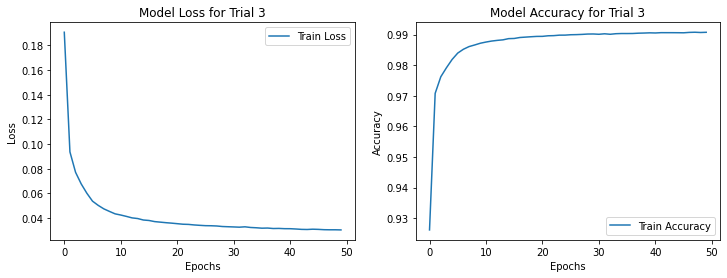

In [13]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss for Trial 3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy for Trial 3')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

7258/7258 [==============================] - 8s 956us/step
Accuracy: 0.49520102309278885
F1-score 0.6386504372270221
              precision    recall  f1-score   support

           0       0.47      0.10      0.16    115936
           1       0.50      0.89      0.64    116301

    accuracy                           0.50    232237
   macro avg       0.49      0.49      0.40    232237
weighted avg       0.49      0.50      0.40    232237

7258/7258 [==============================] - 11s 2ms/step
FPR (False Positive Rate): [0.         0.90162676 0.90163539 0.90198903 0.90202353 0.90203216
 0.9023168  0.90235992 0.90236855 0.90236855 0.90236855 0.90244618
 0.90274807 0.90277394 0.90292058 0.9029292  0.90316209 0.90320522
 0.90321384 0.90324834 0.90324834 0.90324834 0.90337773 0.9034036
 0.90342948 0.90344673 0.90353298 0.90362786 0.90363649 0.90368824
 0.90376587 0.9037745  0.90392975 0.90394701 0.90434378 0.9043524
 0.90459391 0.90461116 0.90474055 0.90474917 0.90477505 0.90478367
 0.9

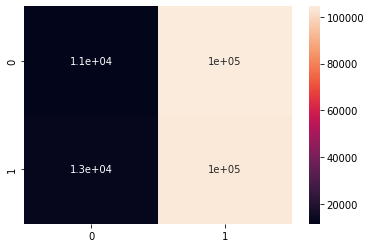

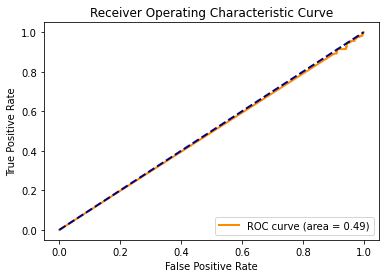

In [14]:
res = []
for i in model.predict(X_test):
    res.append(int(i[0]))
res=np.array(res)
accuracy = accuracy_score(Y_test,res)
print("Accuracy:", accuracy)
print("F1-score",f1_score(Y_test,res))
print(classification_report(Y_test,res))
sns.heatmap(confusion_matrix(Y_test,res),annot=True)
fpr, tpr, thresholds = roc_curve(Y_test, model.predict(X_test))
print(f"FPR (False Positive Rate): {fpr}")
print(f"TPR (True Positive Rate): {tpr}")
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

# Clustering Process

In [36]:
# Prepare data for clustering analysis
process_df = new_df.drop(['Rank','Date','Title','Artists','# of Artist','Artist (Ind.)','# of Nationality','Nationality','Continent','Points (Total)','Points (Ind for each Artist/Nat)','Song URL','results','id'],axis=1)
X=process_df.to_numpy()
y = new_df['Rank'].to_numpy()

rank_vs_count={}
for i in new_df['Rank'].unique():
    rank_vs_count[i]=new_df[new_df['Rank']==i]['Rank'].to_numpy().sum()

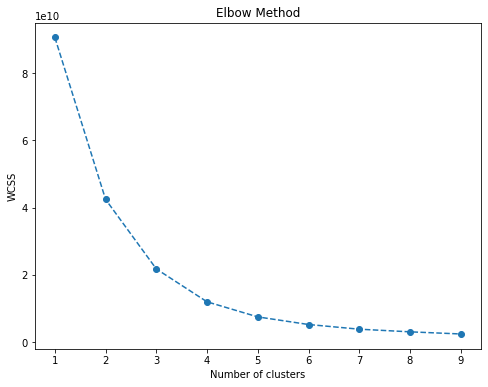

In [13]:
# Perform K-Means clustering and determine the optimal number of clusters using the Elbow Method
wcss = [] 
for i in range(1, 41):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 41), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [29]:
# Perform K-Means clustering with the optimal number of clusters
kmeNS = KMeans(n_clusters=5,random_state=0,n_init='auto').fit(X)
kmeNS.cluster_centers_

array([[ 6.43950549e-01,  4.80789148e-01, -9.40740179e+03,
         1.40723901e-01,  3.70712225e-01,  2.52424451e-02,
         4.05754121e-01],
       [ 6.87694481e-01,  7.50482468e-01, -4.28821591e+03,
         1.15940909e-01,  1.57757468e-01,  5.47175325e-03,
         5.56012013e-01],
       [ 6.88218750e-01,  6.23135517e-01, -6.57566587e+03,
         1.37122296e-01,  2.04483774e-01,  1.05901442e-02,
         4.63273738e-01],
       [ 5.22417508e-01,  2.75047138e-01, -1.46604613e+04,
         1.10922559e-01,  7.08296296e-01,  7.96464646e-02,
         3.62427609e-01],
       [ 6.74607000e-01,  6.60095000e-01, -1.53072311e+02,
         1.24069000e-01,  2.27359000e-01,  1.36430000e-02,
         5.03797000e-01]])

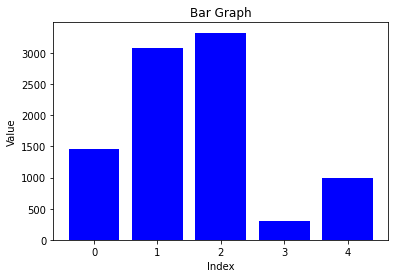

In [15]:
# Visualize cluster distribution
cluster_dist={}
for i in kmeNS.labels_:
    if i in cluster_dist.keys():
        cluster_dist[i]+=1
    else:
        cluster_dist[i]=1
plt.bar(cluster_dist.keys() ,cluster_dist.values(), color='blue')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Bar Graph')
plt.show()

In [16]:
cluster_dist

{1: 3078, 2: 3329, 0: 1456, 4: 1000, 3: 298}

In [17]:
# Analyze cluster performance based on hit song detection
cluster_performance={}
for i in range(len(kmeNS.labels_)):
    if kmeNS.labels_[i] in cluster_performance.keys():
        cluster_performance[kmeNS.labels_[i]]+=spotify[spotify['id']==new_df['id'].iloc[i]]['results'].to_numpy()[0]
    else:
        cluster_performance[kmeNS.labels_[i]]=0
    
cluster_performance

{1: 117, 2: 112, 0: 43, 4: 29, 3: 8}

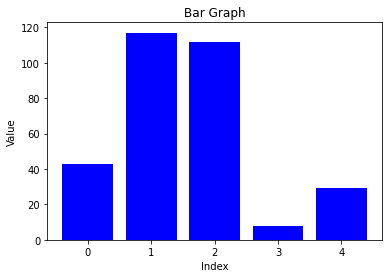

In [18]:
# Visualize cluster performance
plt.bar(cluster_performance.keys() ,cluster_performance.values(), color='blue')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Bar Graph')

plt.show()

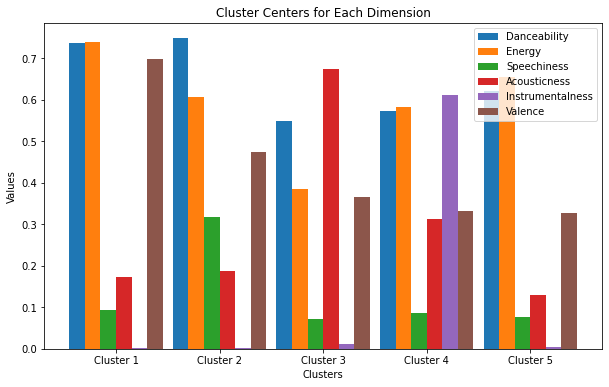

In [32]:
# Visualize cluster centers for each dimension
cluster_centers = np.array([[ 7.36164732e-01,  7.40245003e-01, 9.40435203e-02, 1.73951644e-01,  2.74306899e-03,  6.98611863e-01],
 [ 7.48773531e-01,  6.06065031e-01, 3.17455220e-01, 1.86485454e-01,  1.88819167e-03,  4.74222476e-01],
 [ 5.48552673e-01,  3.84758648e-01,   7.08490566e-02, 6.75198113e-01,  1.17963836e-02,  3.65423742e-01],
 [ 5.73269504e-01,  5.81758865e-01,  8.60070922e-02, 3.12957447e-01,  6.12588652e-01,  3.31680851e-01],
 [ 6.22563083e-01,  6.55714138e-01,  7.77321120e-02, 1.29418942e-01,  4.47597649e-03,  3.27174559e-01]])
cluster_centers_transposed = cluster_centers.T

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.15
bar_positions = np.arange(len(cluster_centers_transposed[0]))
labels = np.array(["Danceability","Energy","Speechiness","Acousticness","Instrumentalness","Valence"])

for i in range(len(cluster_centers_transposed)):
    ax.bar(bar_positions + i * bar_width, cluster_centers_transposed[i], bar_width, label=labels[i])

ax.set_xlabel('Clusters')
ax.set_ylabel('Values')
ax.set_title('Cluster Centers for Each Dimension')
ax.set_xticks(bar_positions + bar_width * (len(cluster_centers_transposed) - 1) / 2)
ax.set_xticklabels([f'Cluster {i+1}' for i in range(len(cluster_centers))])
ax.legend()

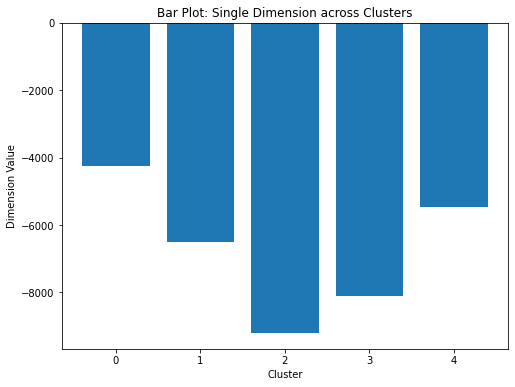

In [33]:
# Visualize cluster centers for a single dimension across clusters
cluster_centers = np.array([[ -4.26171446e+03],
       [-6.48928280e+03],
       [ -9.20883902e+03],
       [ -8.11117135e+03],
       [ -5.47634218e+03]])


num_clusters = len(cluster_centers)

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(range(num_clusters), cluster_centers[:, 0])
ax.set_ylabel('Dimension Value')
ax.set_xlabel('Cluster')
ax.set_title('Bar Plot: Single Dimension across Clusters')

plt.show()